In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import yfinance as yf

data = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week1L\data\raw_analyst_ratings.csv')
data.head()
len(data)

1407328

In [3]:
#Data Processing
# Convert 'date' from string to datetime object and filter out invalid dates
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])
 # Verify the number of rows in the dataset after removing entries with invalid dates
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:

# 2. Count the number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()
print("\nNumber of Articles Per Publisher:")
print(articles_per_publisher)


Number of Articles Per Publisher:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64


In [5]:
data.describe()

,Unnamed: 0
count,5.598700e+04
mean,7.133525e+05
std,4.023792e+05
min,0.000000e+00
25%,3.718360e+05
50%,7.124110e+05
75%,1.068692e+06
max,1.413791e+06


In [6]:
# 3. Analyze the publication dates to see trends over time
data['date'] = data['date'].dt.tz_localize(None)
print(data['date'].head())


0   2020-06-05 10:30:54
1   2020-06-03 10:45:20
2   2020-05-26 04:30:07
3   2020-05-22 12:45:06
4   2020-05-22 11:38:59
Name: date, dtype: datetime64[ns]


In [7]:

# Extract day of the week
data['day_of_week'] = data['date'].dt.day_name()
print(data[['date', 'day_of_week']].head())
#This code extracts the month-year period from the datetime column, removing any timezone information
data['month_year'] = data['date'].dt.to_period('M')
print(data[['date', 'month_year']].head())
# Extract day of the week and month-year for analysis
data['day_of_week'] = data['date'].dt.day_name()
data['month_year'] = data['date'].dt.to_period('M')
print(data[['date', 'day_of_week', 'month_year']].head())
# This code calculates the total number of articles published on each day of the week.
articles_per_day = data['day_of_week'].value_counts()
print("\nNumber of Articles Published Per Day of the Week:")
print(articles_per_day)

# Calculate the number of articles published for each month and year
articles_per_month_year = data['month_year'].value_counts().sort_index()
print("\nNumber of Articles Published Per Month-Year:")
print(articles_per_month_year)

                 date day_of_week
0 2020-06-05 10:30:54      Friday
1 2020-06-03 10:45:20   Wednesday
2 2020-05-26 04:30:07     Tuesday
3 2020-05-22 12:45:06      Friday
4 2020-05-22 11:38:59      Friday
                 date month_year
0 2020-06-05 10:30:54    2020-06
1 2020-06-03 10:45:20    2020-06
2 2020-05-26 04:30:07    2020-05
3 2020-05-22 12:45:06    2020-05
4 2020-05-22 11:38:59    2020-05
                 date day_of_week month_year
0 2020-06-05 10:30:54      Friday    2020-06
1 2020-06-03 10:45:20   Wednesday    2020-06
2 2020-05-26 04:30:07     Tuesday    2020-05
3 2020-05-22 12:45:06      Friday    2020-05
4 2020-05-22 11:38:59      Friday    2020-05

Number of Articles Published Per Day of the Week:
day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64

Number of Articles Published Per Month-Year:
month_year
2011-04       6
2011-05      78
2011-06      96
2

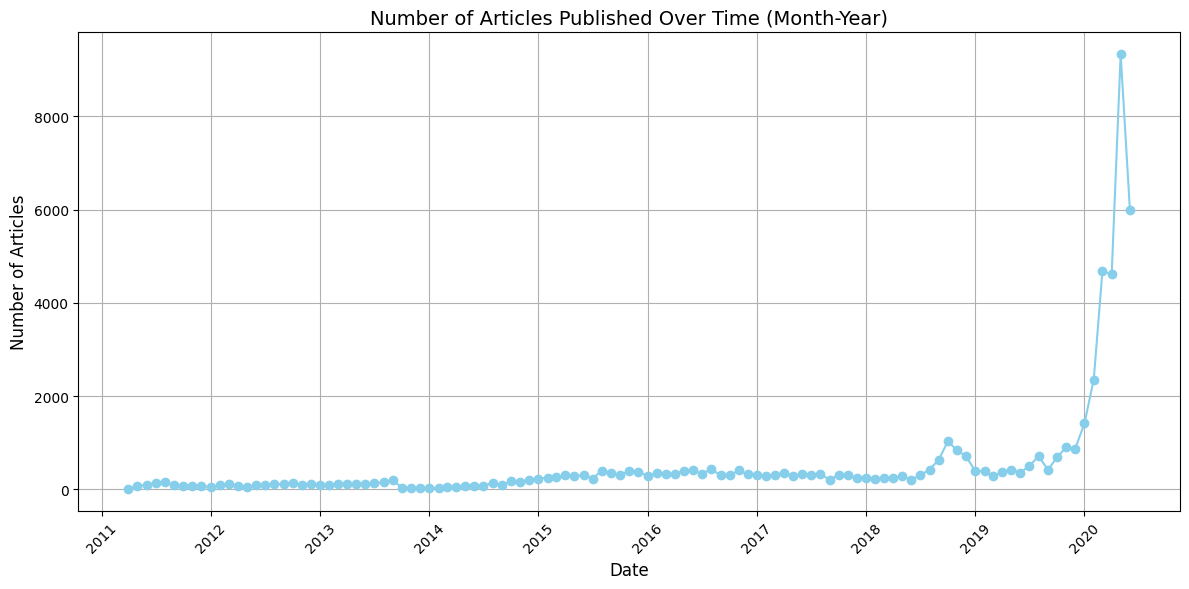

In [8]:
import matplotlib.pyplot as plt

# This code converts the 'month_year' index to a datetime format to enable accurate time series plotting.
articles_per_month_year.index = articles_per_month_year.index.to_timestamp()

# This code generates a time series line plot to visualize the number of articles published each month

plt.figure(figsize=(12, 6))
plt.plot(articles_per_month_year.index, articles_per_month_year.values, marker='o', linestyle='-', color='skyblue')
plt.title('Number of Articles Published Over Time (Month-Year)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot 
plt.savefig('articles_published_over_time.png', format='png', dpi=300)  

# Show the plot
plt.show()